In [64]:
pip install jcopml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe

In [74]:
df = pd.read_excel (r'data_pa.xlsx')
df.to_csv (r'data_pa.csv', index = None, header=True)
df

,Nama,Tanggungan,Pekerjaan,Penghasilan,Jenis Lantai,Jenis Dinding,Sumber Listrik,Sumber Air,SK MCK,SK Rumah,Status
0,Heri,1,Karyawan Swasta,2.100.000 - 3.000.000,Keramik,Bata,PLN,PDAM,Milik Sendiri,Milik Sendiri,Tidak Layak
1,Manto,2,Karyawan Honorer,1.100.000 - 2.000.000,Keramik,Bata,PLN,PDAM,Milik Sendiri,Milik Sendiri,Layak
2,Hendra,3,Buruh Harian Lepas,0 - 1.000.000,Non-Keramik,Bambu,PLN,Sumur,Umum,Milik Sendiri,Layak
3,Fajar,2,Buruh Tani,0 - 1.000.000,Keramik,Bata,PLN,Sumur,Milik Sendiri,Milik Sendiri,Layak
4,Maman,2,Karyawan Swasta,2.100.000 - 3.000.000,Keramik,Bata,PLN,PDAM,Milik Sendiri,Milik Sendiri,Tidak Layak
...,...,...,...,...,...,...,...,...,...,...,...
105,Ali,1,Buruh Tani,0 - 1.000.000,Keramik,Bata,PLN,Sumur,Milik Sendiri,Milik Sendiri,Layak
106,Handoyo,3,Buruh Tani,0 - 1.000.000,Non-Keramik,Bambu,PLN,Sumur,Umum,Milik Sendiri,Layak
107,Mahadi,4,Buruh Harian Lepas,0 - 1.000.000,Non-Keramik,Bambu,PLN,Sumur,Milik Sendiri,Milik Sendiri,Layak
108,Sukarya,3,Wiraswasta,2.100.000 - 3.000.000,Keramik,Bata,PLN,PDAM,Milik Sendiri,Milik Sendiri,Tidak Layak


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Nama            110 non-null    object
 1   Tanggungan      110 non-null    int64 
 2   Pekerjaan       110 non-null    object
 3   Penghasilan     110 non-null    object
 4   Jenis Lantai    110 non-null    object
 5   Jenis Dinding   110 non-null    object
 6   Sumber Listrik  110 non-null    object
 7   Sumber Air      110 non-null    object
 8   SK MCK          110 non-null    object
 9   SK Rumah        110 non-null    object
 10  Status          110 non-null    object
dtypes: int64(1), object(10)
memory usage: 9.6+ KB


Tahap selanjutnya kita mengambil kolom "Status" untuk dijadikan label

In [76]:
ds = df.drop(columns="Nama")
X = ds.drop(columns="Status")
y = df.Status

Setelah itu, dilakukanlah pembagian data menjadi dua yaitu 80% data training dan 20% data testing.

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((88, 9), (22, 9), (88,), (22,))

In [78]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ["Tanggungan"]),
    ('categoric', cat_pipe(encoder='onehot'), ['Pekerjaan', 'Penghasilan', 'Jenis Lantai', 'Jenis Dinding', 'Sumber Listrik', 'Sumber Air', 'SK MCK', 'SK Rumah']),
])

Setelah pembagian data, selanjutnya yaitu tahap pembuatan model Naive Bayes dengan menggunakan Gaussian Naive Bayes

In [79]:
from sklearn.naive_bayes import GaussianNB
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', GaussianNB())
])

In [80]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Tanggungan']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pekerjaan', 'Penghasilan',
                                                   'Jenis Lantai',
                                                   'Jenis Dinding',
              

In [81]:
pipeline.score(X_train, y_train)

0.9886363636363636

In [82]:
pipeline.score(X_test, y_test)

0.9090909090909091

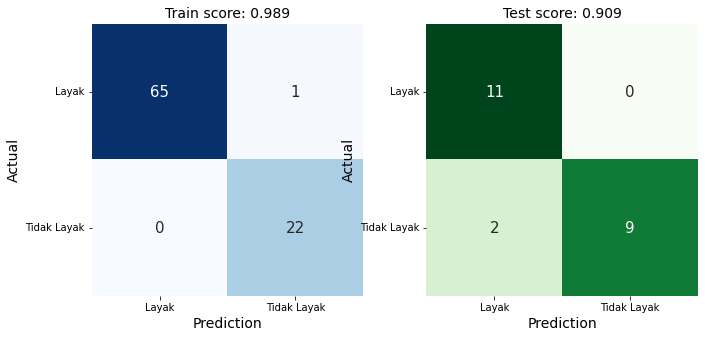

In [83]:
from jcopml.plot import plot_confusion_matrix
plot_confusion_matrix(X_train, y_train, X_test, y_test, pipeline)

Hasil evaluasi model dengan menggunakan Confussion Matrix menunjukan bahwa algoritma Naive Bayes yang digunakan memiliki tingkat akurasi 98% untuk 

# Prediction

Setelah pembuatan model Naive Bayes, kita coba prediksi calon penerima bantuan dengan data testing.

In [84]:
X_pred = pd.read_excel (r'testing.xlsx')
X_pred.to_csv (r'testing.csv', index = None, header=True)
X_pred

,Nama,Tanggungan,Pekerjaan,Penghasilan,Jenis Lantai,Jenis Dinding,Sumber Listrik,Sumber Air,SK MCK,SK Rumah,Status
0,Jojo,4,Buruh Tani,0 - 1.000.000,Non-Keramik,Bambu,PLN,Sumur,Milik Sendiri,Milik Sendiri,NaN
1,Lukman,2,Wiraswasta,5.100.000 - 6.000.000,Keramik,Bata,PLN,PDAM,Milik Sendiri,Milik Sendiri,NaN
2,Rustam,2,Buruh Harian Lepas,0 - 1.000.000,Non-Keramik,Bambu,PLN,Sumur,Milik Sendiri,Milik Sendiri,NaN


In [85]:
pipeline.predict(X_pred)

array(['Layak', 'Tidak Layak', 'Layak'], dtype='<U11')

In [86]:
X_pred["Status"] = pipeline.predict(X_pred)
X_pred

,Nama,Tanggungan,Pekerjaan,Penghasilan,Jenis Lantai,Jenis Dinding,Sumber Listrik,Sumber Air,SK MCK,SK Rumah,Status
0,Jojo,4,Buruh Tani,0 - 1.000.000,Non-Keramik,Bambu,PLN,Sumur,Milik Sendiri,Milik Sendiri,Layak
1,Lukman,2,Wiraswasta,5.100.000 - 6.000.000,Keramik,Bata,PLN,PDAM,Milik Sendiri,Milik Sendiri,Tidak Layak
2,Rustam,2,Buruh Harian Lepas,0 - 1.000.000,Non-Keramik,Bambu,PLN,Sumur,Milik Sendiri,Milik Sendiri,Layak


Dapat kita lihat, dari 3 data testing terdapat 2 orang yang layak untuk menerima bantuan dan 1 orang tidak layak untuk menerima bantuan.